In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [23]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

In [44]:
# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.DataFrame(results, columns=['date', 'precipitation'])
data.set_index(data['date'], inplace=True)
data.head()


,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


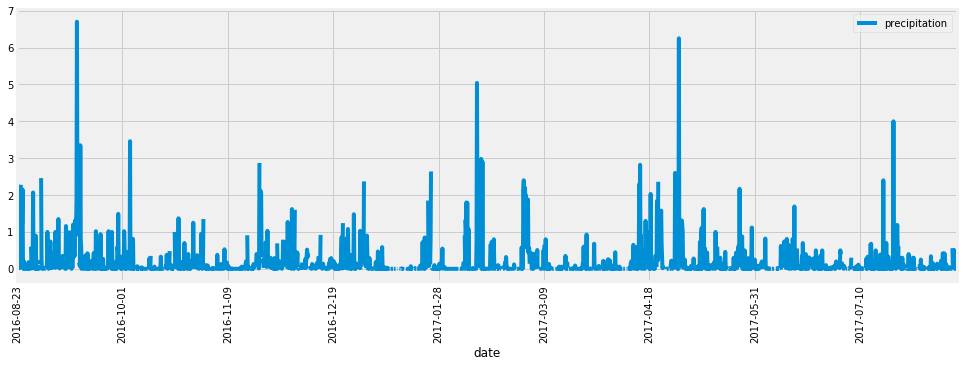

In [34]:
# Sort the dataframe by date
data = data.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
data.plot(figsize=(15,5), rot=90)

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [64]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.station).all()
stations_df = pd.DataFrame(stations, columns=['station'])
all_stations  = pd.DataFrame(stations_df.station.unique())
all_stations.count()


0    9
dtype: int64

In [65]:
#Second method
session.query(func.count(Station.station)).all()

[(9)]

In [128]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [104]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
act_station = "USC00519281"
act_station_all = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station >= act_station).all()
print(min(act_station_all), max(act_station_all))
act_stations_df = pd.DataFrame(act_station_all, columns=['station', 'temp'])
act_stations_df.describe() 

('USC00519281', 54.0) ('USC00519523', 85.0)


,temp
count,8165.000000
mean,73.569137
std,4.644150
min,54.000000
25%,71.000000
50%,74.000000
75%,77.000000
max,87.000000


In [107]:
#Second Method
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station >= act_station).all()

[(54.0, 87.0, 73.56913655848132)]

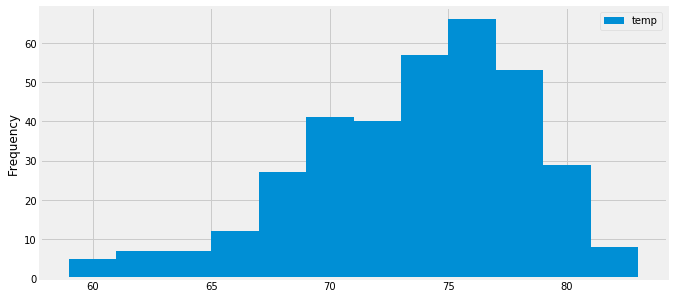

In [127]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
act_station = "USC00519281"
act_station_yr = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == act_station).\
    filter(Measurement.date >= prev_year).all()
act_station_yr = pd.DataFrame(act_station_yr, columns=['station','temp'])
act_station_yr.plot.hist(bins=12,figsize=(10,5))
